# Homework 5

### Imports and setup

In [1]:
import numpy as np
import networkx as nx
import eurovision_utils as eu

In [2]:
try:
    G, pos_geo, flags = eu.DataLoader.load_eurovision_data(
        'G_esc_2018.pkl', 
        'pos_geo.pkl', 
        'flags.pkl'
    )
    print(f"Loaded Graph: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges.")
except FileNotFoundError:
    print("Error: Pickle files (G_esc_2018.pkl, etc.) not found in directory.")

Loaded Graph: 43 nodes, 1118 edges.


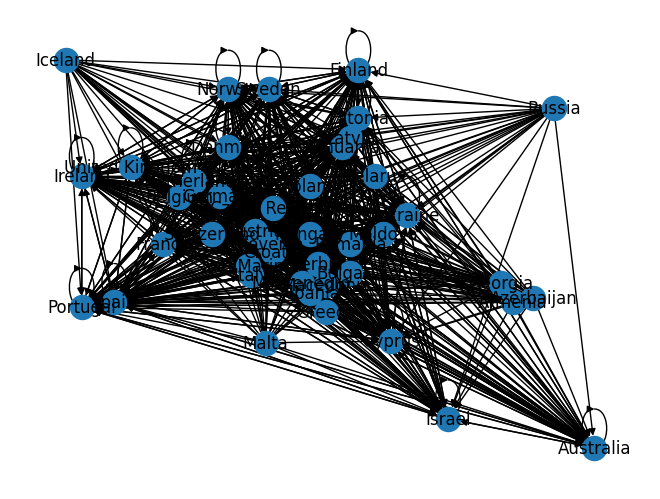

In [3]:
nx.draw(G, pos=pos_geo, with_labels=True)

### Task (a): Clustering coefficient

In [11]:
real_cc = eu.NetworkAnalyzer.get_weighted_clustering_coefficient(G)
print(f"Real weighted clustering coefficient: {real_cc:.4f}")

random_ccs = []
for _ in range(100):
    G_rand = eu.RandomGraphGenerator.generate_random_configuration(G)
    cc = eu.NetworkAnalyzer.get_weighted_clustering_coefficient(G_rand)
    random_ccs.append(cc)

higher_count = sum(1 for cc in random_ccs if cc > real_cc)
print(f"Random graphs with higher CC: {higher_count}/100")
print(f"Avg. random CC: {np.mean(random_ccs):.4f}")

Real weighted clustering coefficient: 0.0574
Random graphs with higher CC: 0/100
Avg. random CC: 0.0331


### Task (b): Degree distribution

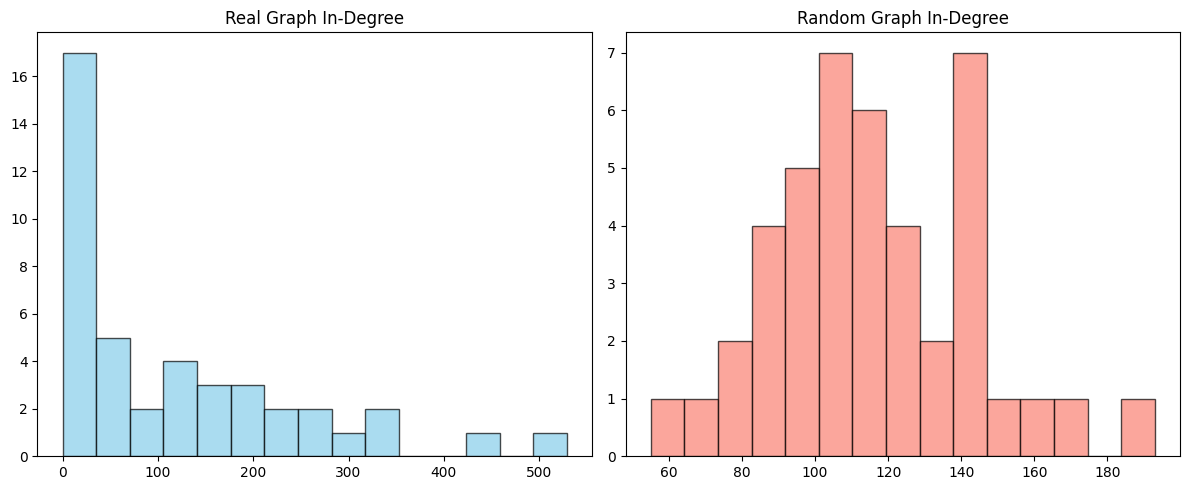

In [12]:
degrees_real = eu.NetworkAnalyzer.get_in_degree_distribution(G)
degrees_random = eu.NetworkAnalyzer.get_in_degree_distribution(G_rand)
eu.Visualizer.compare_degree_distributions(degrees_real, degrees_random)

### Task (c, d, e): Community detection 

In [4]:
# Task c: Bidirectional
G_u1 = eu.GraphTransformer.to_undirected_bidirectional(G)
comm_c = eu.NetworkAnalyzer.get_girvan_newman_communities(G_u1)
print(f"Task (c) split:\n\tCommunity 1 ({len(comm_c[0])} nodes): {comm_c[0]}\n\tCommunity 2 ({len(comm_c[1])} nodes): {comm_c[1]}")

# Task d: Union
G_u2 = eu.GraphTransformer.to_undirected_union(G)
comm_d = eu.NetworkAnalyzer.get_girvan_newman_communities(G_u2)
print(f"Task (d) split:\n\tCommunity 1 ({len(comm_d[0])} nodes): {comm_d[0]}\n\tCommunity 2 ({len(comm_d[1])} nodes): {comm_d[1]}")

# Task e: Weighted sum + Kernighan-Lin
G_u3 = eu.GraphTransformer.to_undirected_weighted_sum(G)
comm_e = eu.NetworkAnalyzer.get_kernighan_lin_communities(G_u3)
print(f"Task (e) split:\n\tCommunity 1 ({len(comm_e[0])} nodes): {comm_e[0]}\n\tCommunity 2 ({len(comm_e[1])} nodes): {comm_e[1]}")

Task (c) split:
	Community 1 (25 nodes): {'Denmark', 'Hungary', 'Italy', 'France', 'Ireland', 'Spain', 'Austria', 'Estonia', 'Australia', 'Netherlands', 'Israel', 'Bulgaria', 'Serbia', 'Moldova', 'Lithuania', 'Finland', 'Portugal', 'United Kingdom', 'Sweden', 'Norway', 'Czech Republic', 'Slovenia', 'Germany', 'Cyprus', 'Ukraine'}
	Community 2 (1 nodes): {'Albania'}
Task (d) split:
	Community 1 (42 nodes): {'Macedonia', 'Denmark', 'Hungary', 'Azerbaijan', 'Italy', 'France', 'Ireland', 'Armenia', 'Spain', 'Georgia', 'Austria', 'Estonia', 'Australia', 'Netherlands', 'Poland', 'Israel', 'Bulgaria', 'Switzerland', 'Serbia', 'Moldova', 'San Marino', 'Albania', 'Lithuania', 'Finland', 'Portugal', 'Malta', 'United Kingdom', 'Russia', 'Belgium', 'Belarus', 'Sweden', 'Greece', 'Norway', 'Romania', 'Czech Republic', 'Slovenia', 'Germany', 'Cyprus', 'Croatia', 'Iceland', 'Latvia', 'Ukraine'}
	Community 2 (1 nodes): {'Montenegro'}
Task (e) split:
	Community 1 (21 nodes): {'Macedonia', 'Hungary', 'A

### Task (f): Community *cores*

In [5]:
ordered_partitions = [comm_e, comm_c, comm_d]

core_1, core_2 = eu.NetworkAnalyzer.find_community_cores(ordered_partitions)
print(f"Core 1 ({len(core_1)} countries): {core_1}")
print(f"Core 2 ({len(core_2)} countries): {core_2}")

all_nodes = set(G.nodes())
outside_nodes = all_nodes - core_1 - core_2
print(f"\nCountries dropped from cores ({len(outside_nodes)}): {outside_nodes}")

Core 1 (0 countries): set()
Core 2 (16 countries): {'Denmark', 'Sweden', 'Estonia', 'Austria', 'Norway', 'Israel', 'Lithuania', 'Germany', 'Australia', 'Netherlands', 'Finland', 'Portugal', 'France', 'Ireland', 'United Kingdom', 'Spain'}

Countries dropped from cores (27): {'Macedonia', 'Hungary', 'Azerbaijan', 'Italy', 'Armenia', 'Georgia', 'Poland', 'Switzerland', 'Bulgaria', 'Moldova', 'Montenegro', 'San Marino', 'Serbia', 'Albania', 'Russia', 'Malta', 'Belgium', 'Belarus', 'Greece', 'Romania', 'Czech Republic', 'Slovenia', 'Cyprus', 'Croatia', 'Iceland', 'Latvia', 'Ukraine'}


### Task (g): Visualization with flags

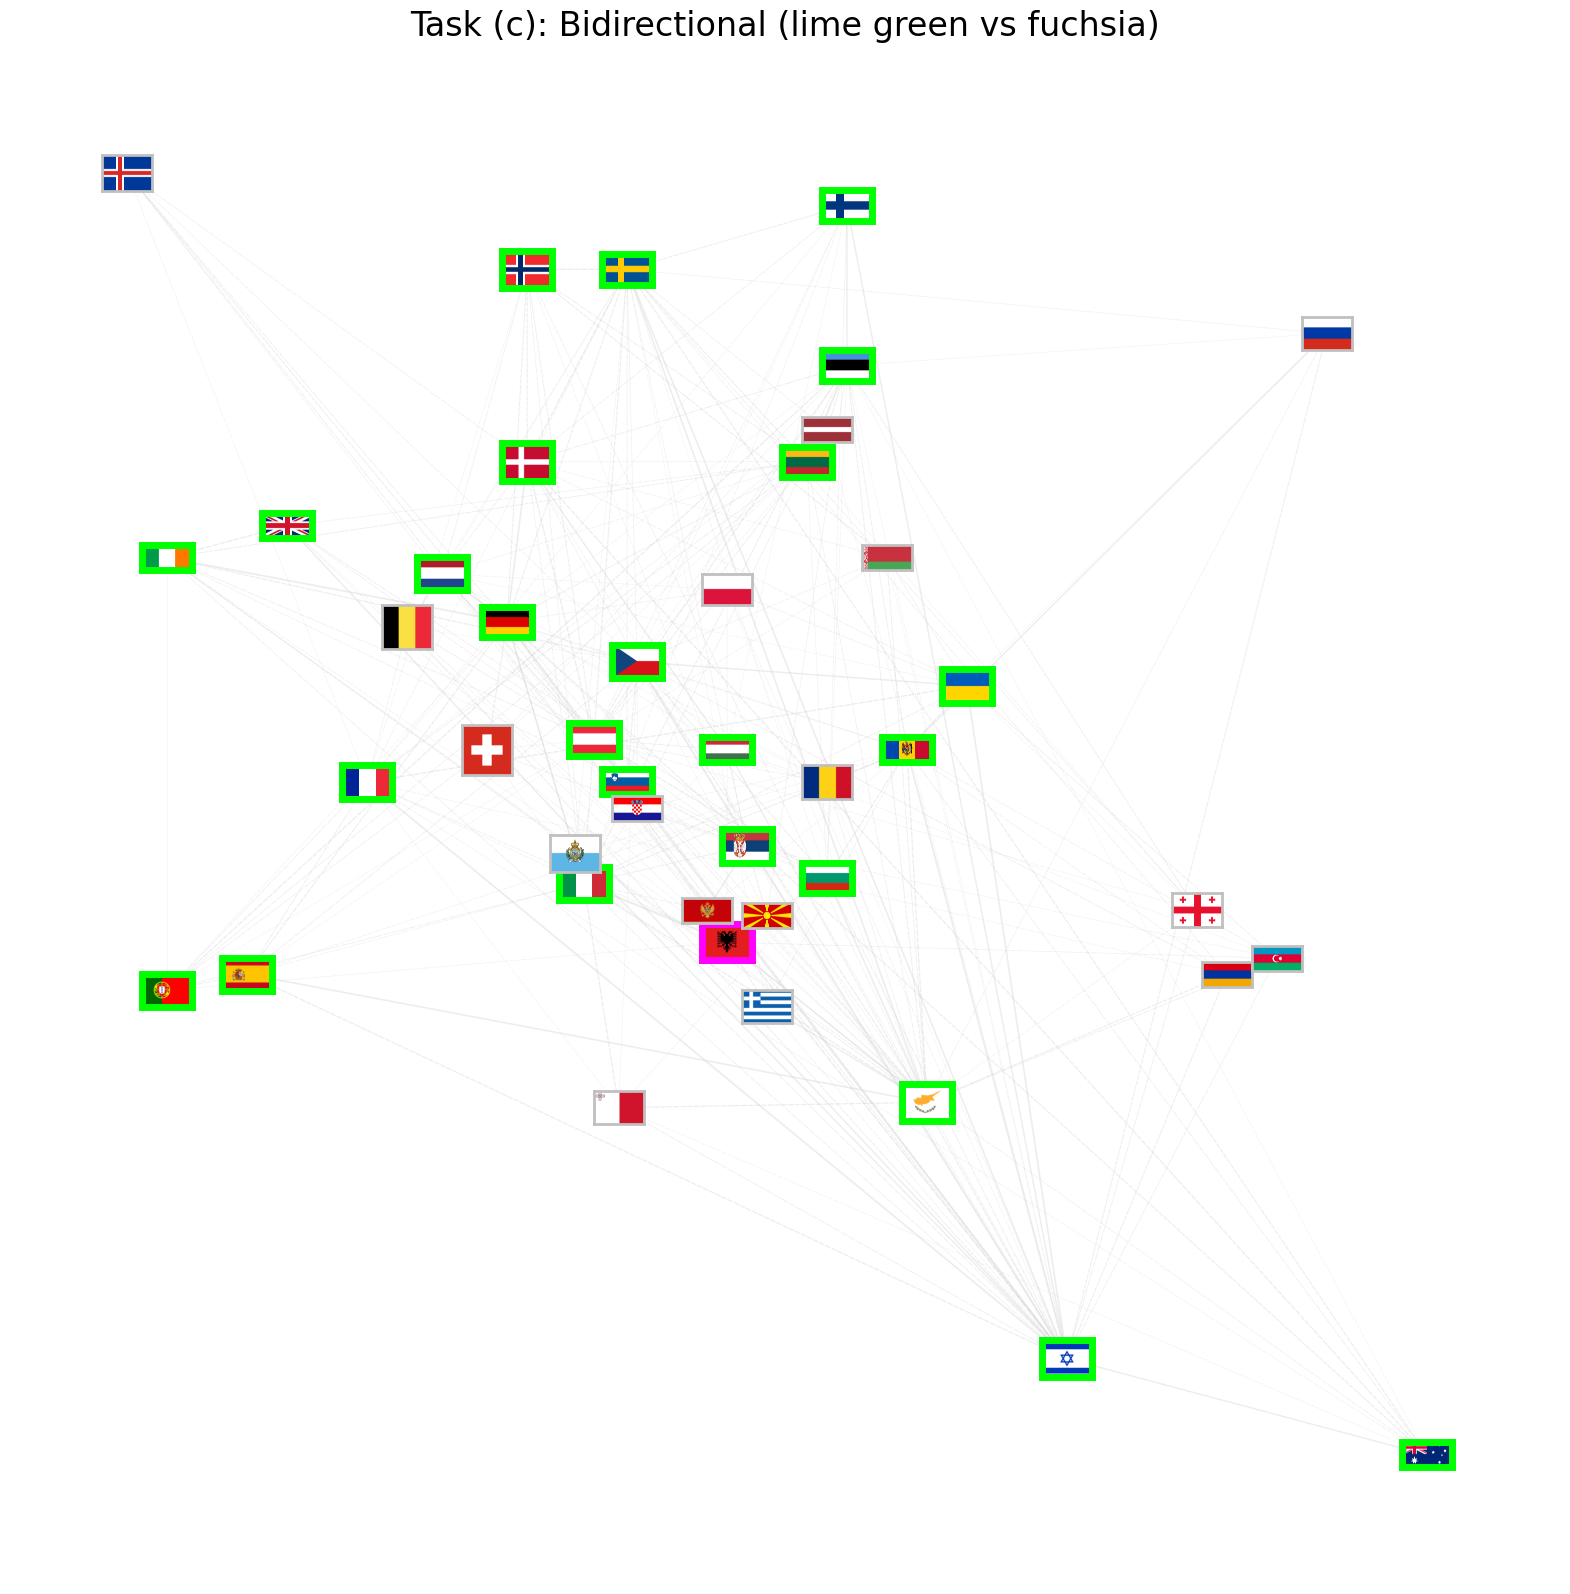

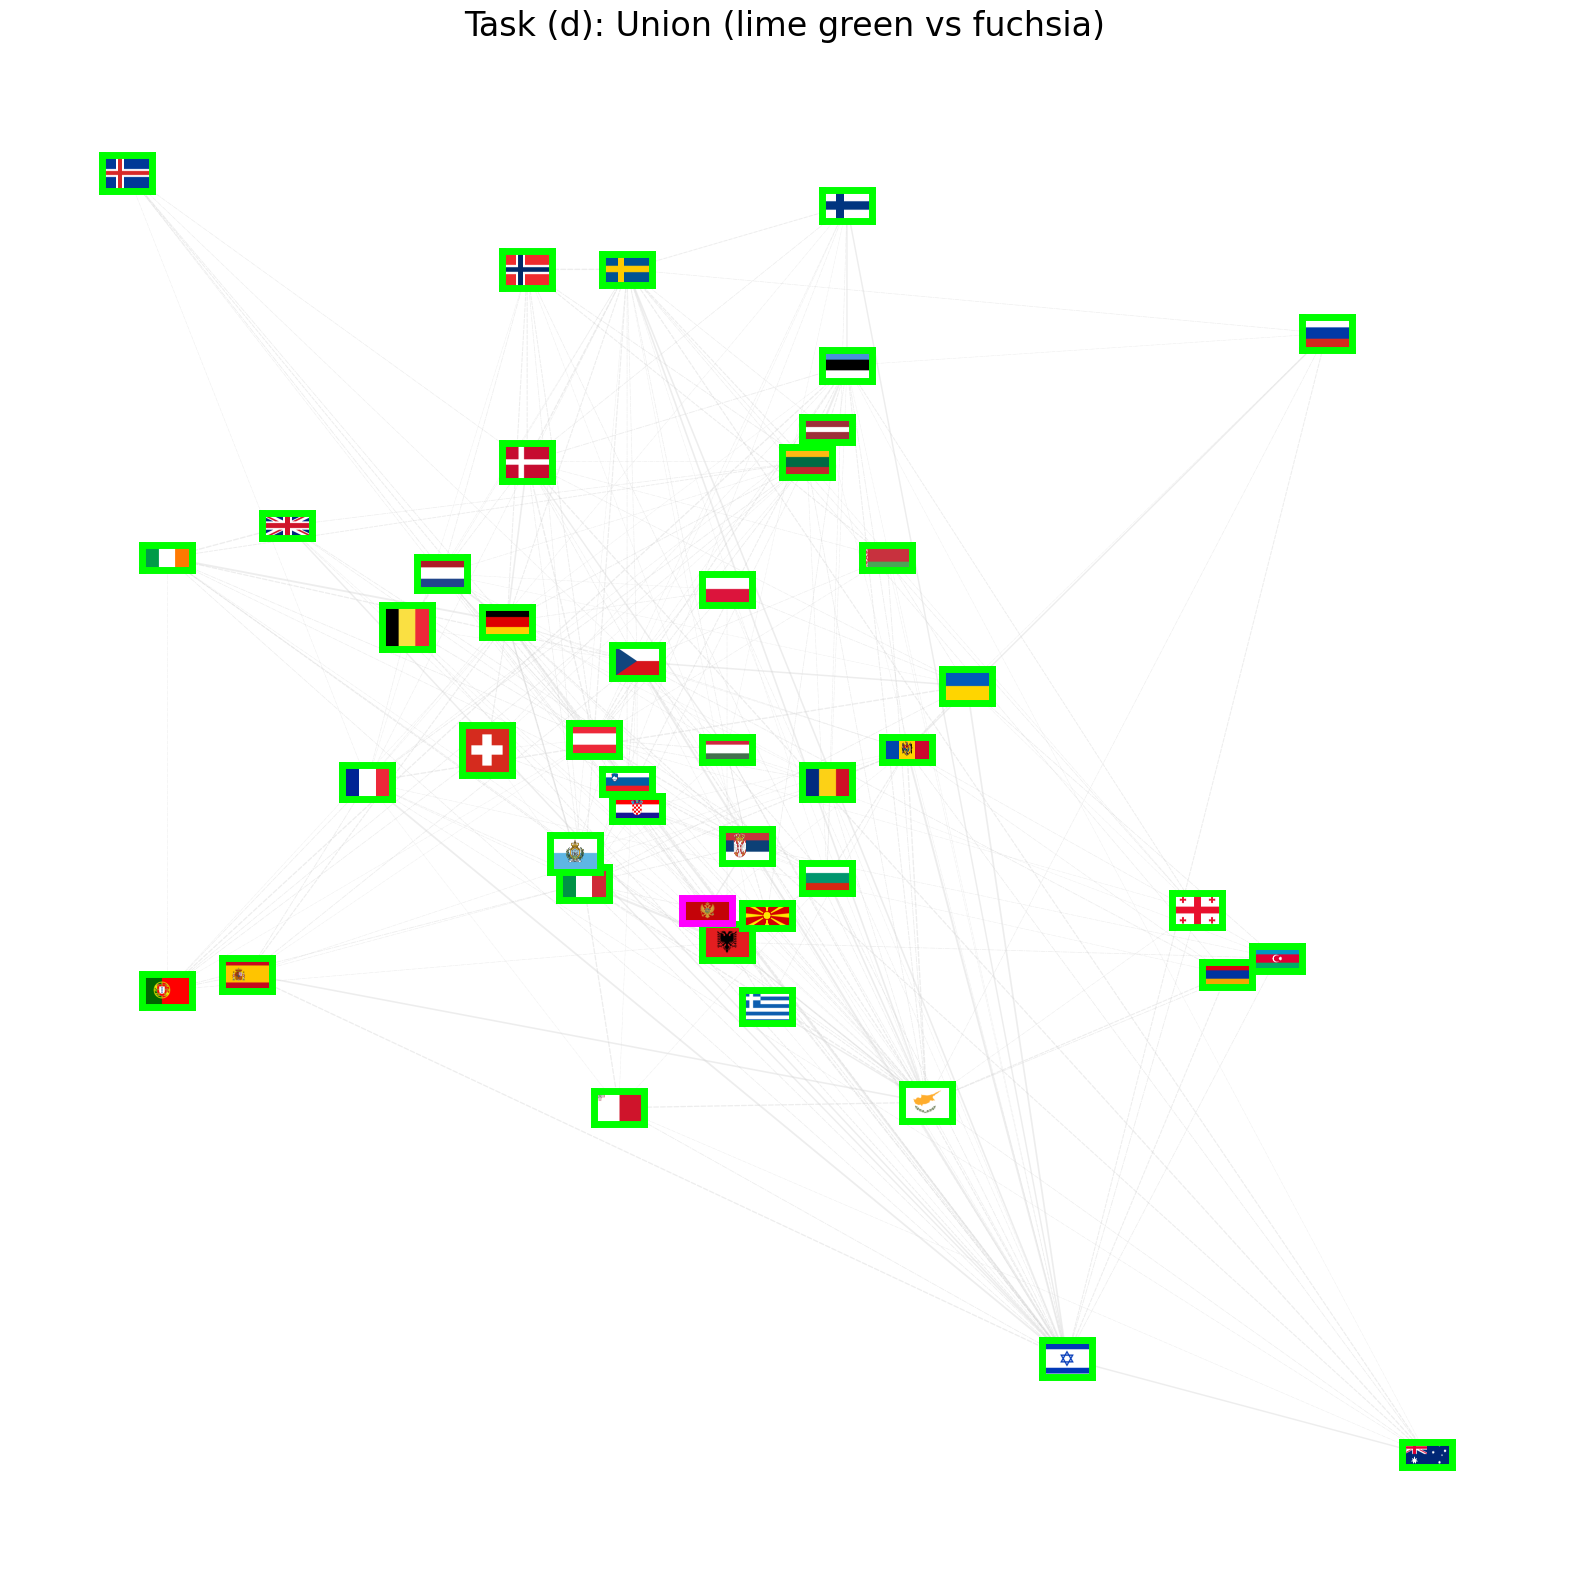

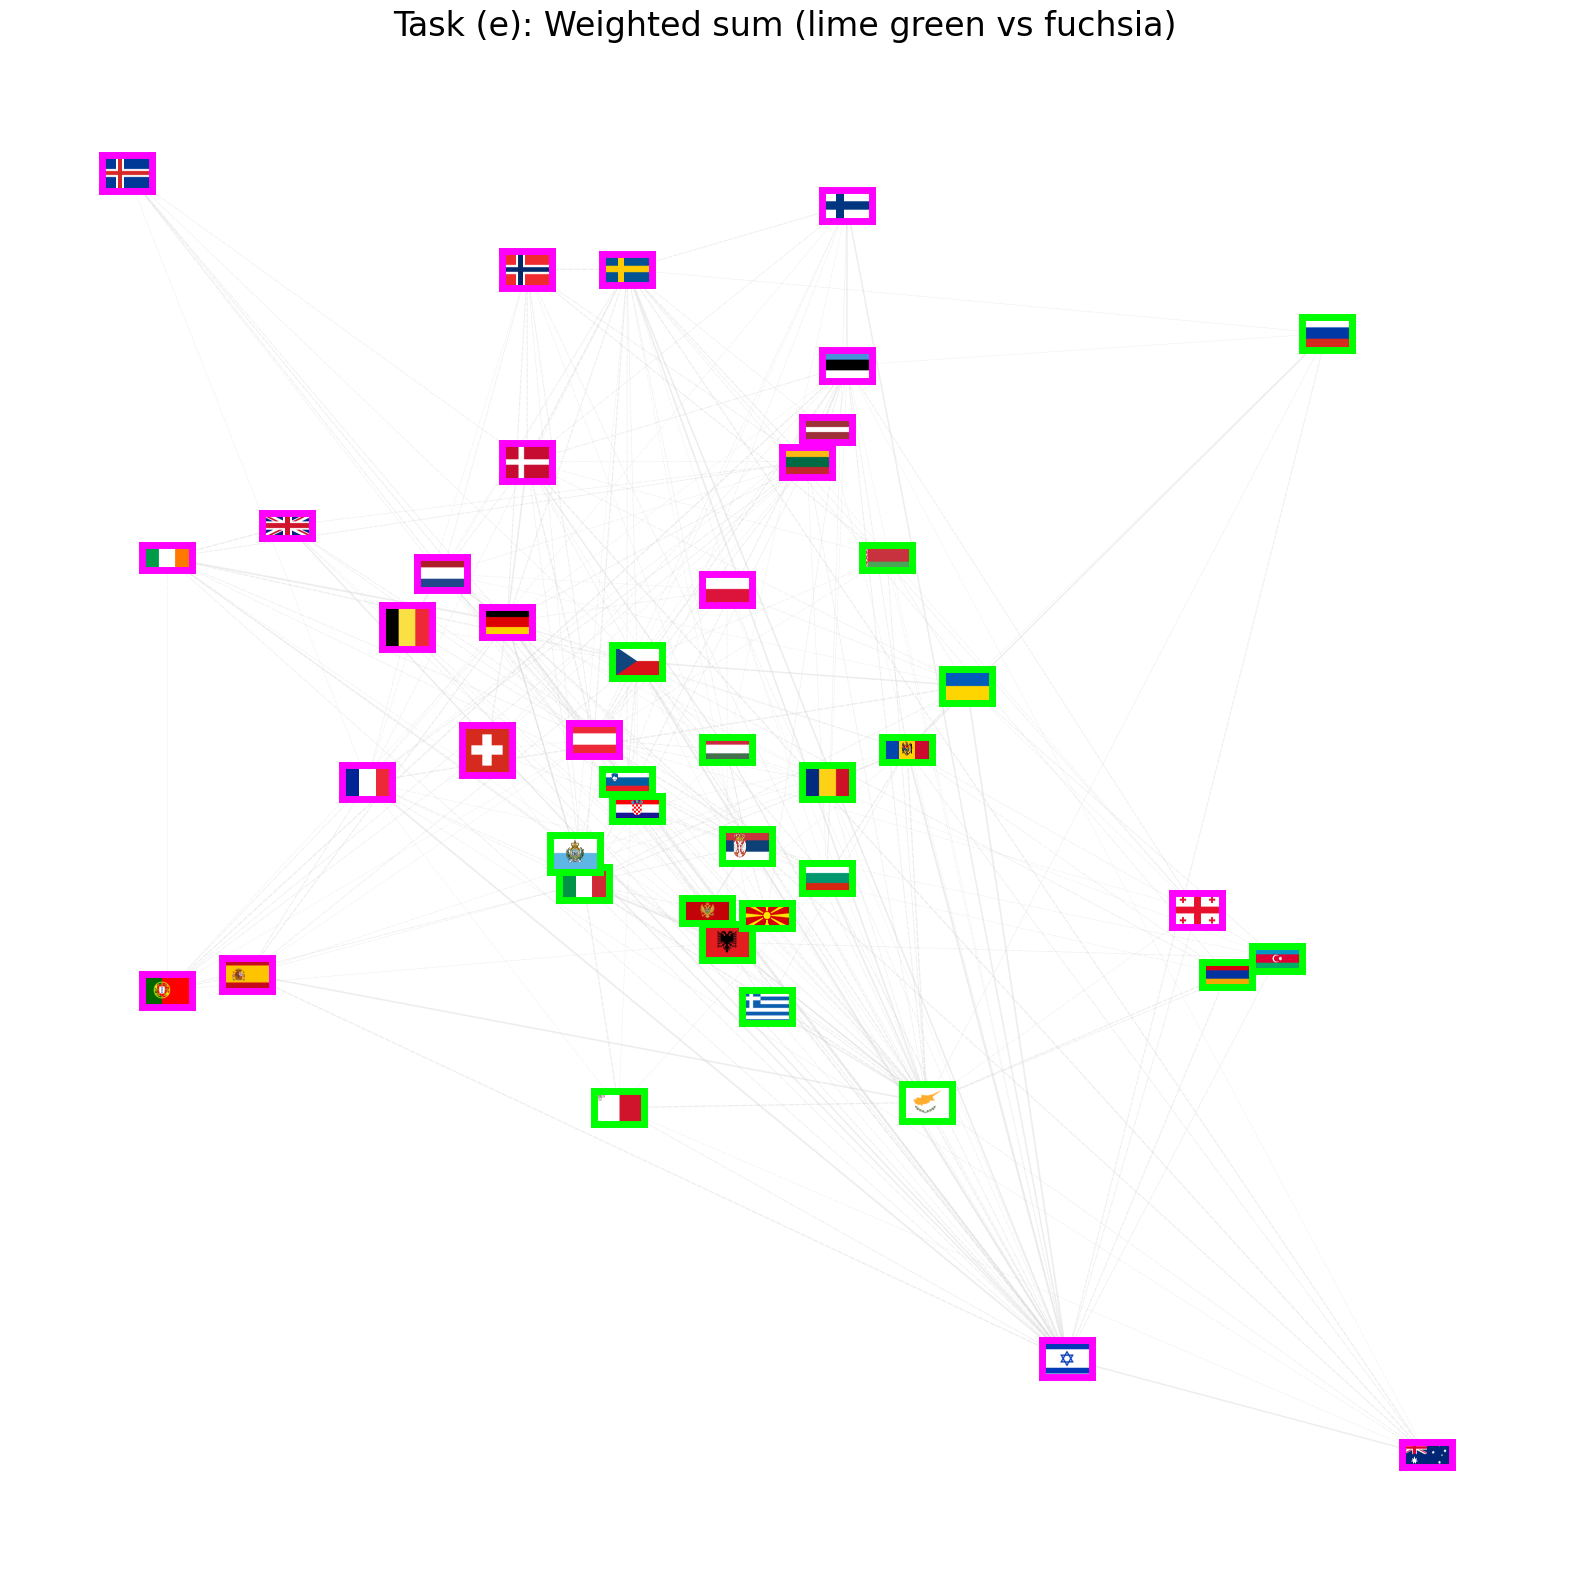

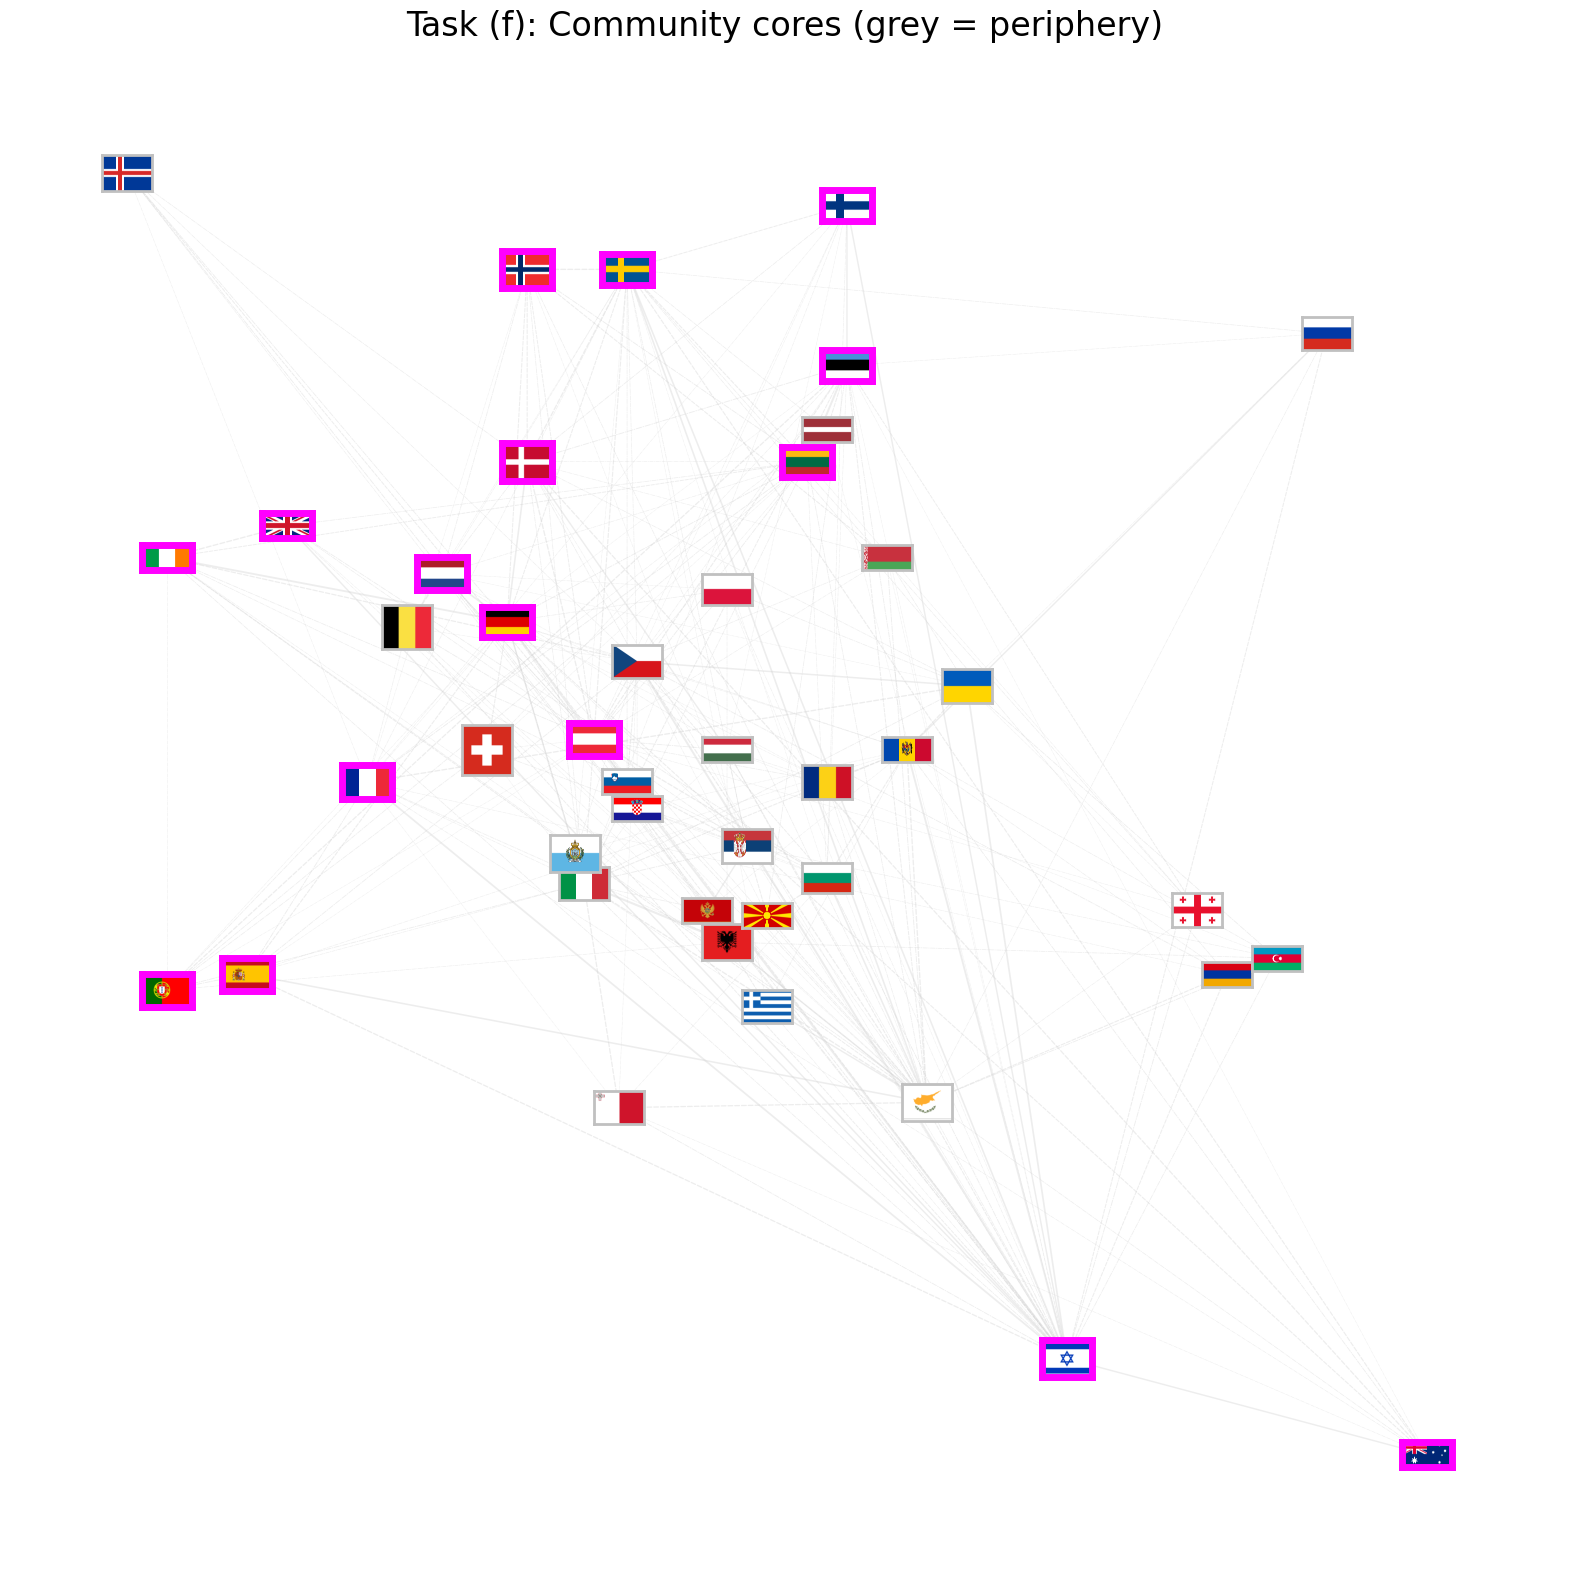

In [6]:
eu.Visualizer.draw_eurovision_map_with_communities(
    G_u3, pos_geo, flags, comm_c, 
    title="Task (c): Bidirectional (lime green vs fuchsia)"
)

eu.Visualizer.draw_eurovision_map_with_communities(
    G_u3, pos_geo, flags, comm_d, 
    title="Task (d): Union (lime green vs fuchsia)"
)

eu.Visualizer.draw_eurovision_map_with_communities(
    G_u3, pos_geo, flags, comm_e, 
    title="Task (e): Weighted sum (lime green vs fuchsia)"
)

eu.Visualizer.draw_eurovision_map_with_communities(
    G_u3, pos_geo, flags, (core_1, core_2), 
    title="Task (f): Community cores (grey = periphery)"
)